# Boston housing price regression dataset

Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).


## Variables in order:

 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population

 MEDV     Median value of owner-occupied homes in $1000's

Firstly, let's select TensorFlow version 2.x in colab

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Import dataset
- This dataset can be imported
- High level API Keras has some datasets available
- You can look at all the datasets available here https://keras.io/datasets/


In [ ]:
from tensorflow.keras.datasets import boston_housing

# boston_housing.load_data() function returns 2 tuples, one for train data and 
# other for test data. We will take only train data here.
(X_train, Y_train),(X_test, Y_test)  = boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

57344/57026 [==============================] - 0s 0us/step


### Getting details of dataset
- We will see how many rows are there in the data
- We will check how many features are there

In [ ]:
print('Number of examples in train set: ', X_train.shape[0])
print('Number of features for each example: ', X_train.shape[1])
print('Shape of actual prices in training data: ', Y_train.shape)

Number of examples in train set:  404
Number of features for each example:  13
Shape of actual prices in training data:  (404,)


In [ ]:
print('Number of examples in test set: ', X_test.shape[0])
print('Shape of actual prices in test data: ', Y_test.shape)

Number of examples in test set:  102
Shape of actual prices in test data:  (102,)


Let's see some values of features and labels from the dataset

### We must normalize our data for neural networks to perform optimally

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale both the training inputs and outputs
scaled_train_x = scaler.fit_transform(X_train)
scaled_test_x = scaler.transform(X_test)

scaled_train_y = scaler.fit_transform(Y_train.reshape(-1, 1))
scaled_test_y = scaler.transform(Y_test.reshape(-1, 1))

### Build the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

###Building the model using Keras standalone library

Skeleton model 

In [ ]:
import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu')
  model.add(input_layer) # 
  #Adding the hidden layer
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(16, activation='relu'); 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 
 #Loss function 
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

Build the model and view the summary

In [ ]:
#Getting the model summary. We are uisng standalone keras to build our model
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Let’s now train the model for 100 epochs, and record the training and validation accuracy in ‘history’.

In [ ]:
#Definign the number of epochs
EPOCHS = 100
#fitting the model
history = model.fit(
  scaled_train_x , scaled_train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 0.1570 - mse: 0.1570 - val_loss: 0.0858 - val_mse: 0.0858
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0227 - 

Let's plot the  validation and training loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


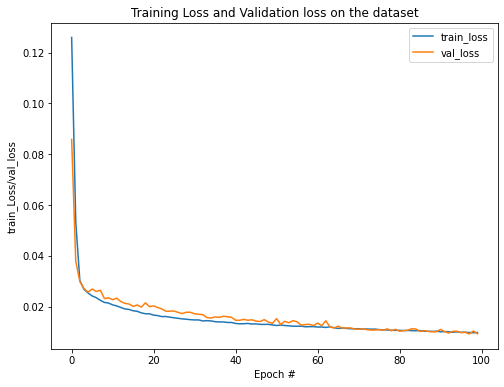

In [ ]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

In [ ]:
model.evaluate(scaled_test_x , scaled_test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.0094 - mse: 0.0094


[0.009357094764709473, 0.009357094764709473]

In [ ]:
#Lets Print the predicted prices 
test_predictionsk=model.predict(scaled_test_x )
y_pred1=scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(scaler.inverse_transform(scaled_test_y.reshape(-1, 1)),y_pred1)

0.7723781596021885

# Model-2 

Let's do the weight initialization 

In [ ]:
import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='he_normal')
  model.add(input_layer) # 
  #Adding the hidden layer
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(16, activation='relu',kernel_initializer='he_normal'); # defining the weight initialiazer 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu',kernel_initializer='he_normal') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 
 #Loss function 
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

In [ ]:
#Getting the model summary. We are uisng standalone keras to build our model
model2 = build_model()
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Definign the number of epochs
import numpy as np
EPOCHS = 100
#fitting the model
history = model2.fit(
  scaled_train_x , scaled_train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1856 - m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


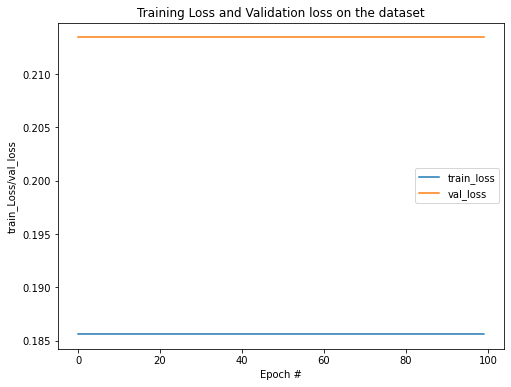

In [ ]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

As you can see , the above model is underfitting since it is not able to learn the training data. Here, model is not at all learning anything when we change the weight initializer to hue_normal from the default GlorotUniform, the model started underfitting. 


##Testing the model



In [ ]:
model2.evaluate(scaled_test_x , scaled_test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2025 - mse: 0.2025


[0.2025054544210434, 0.2025054544210434]

In [ ]:
#Lets Print the predicted prices 
test_predictionsk=model2.predict(scaled_test_x )
y_pred1=scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(scaler.inverse_transform(scaled_test_y.reshape(-1, 1)),y_pred1)

-3.9261721641116347

#Model-**3**

Adding Batch norm **layer**

In [ ]:
import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense,Dropout,BatchNormalization       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='he_normal')
  model.add(input_layer) # 
  #Adding the hidden layer
  model.add(BatchNormalization())# defining the batchnorm
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(16, activation='relu',kernel_initializer='he_normal'); # defining the weight initialiazer 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu',kernel_initializer='he_normal') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 
 #Loss function 
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

In [ ]:
#Getting the model summary. We are uisng standalone keras to build our model
model3 = build_model()
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 112       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 305
Trainable params: 289
Non-trainable params: 16
_________________________________________________________________


In [ ]:
#Definign the number of epochs
import numpy as np
EPOCHS = 100
#fitting the model
history = model3.fit(
  scaled_train_x , scaled_train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Epoch 1/100
11/11 [==============================] - 3s 28ms/step - loss: 0.3135 - mse: 0.3135 - val_loss: 0.2075 - val_mse: 0.2075
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.2103 - val_mse: 0.2103
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1189 - mse: 0.1189 - val_loss: 0.2047 - val_mse: 0.2047
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1999 - val_mse: 0.1999
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.2016 - val_mse: 0.2016
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0857 - mse: 0.0857 - val_loss: 0.1879 - val_mse: 0.1879
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.1913 - val_mse: 0.1913
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0931 - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


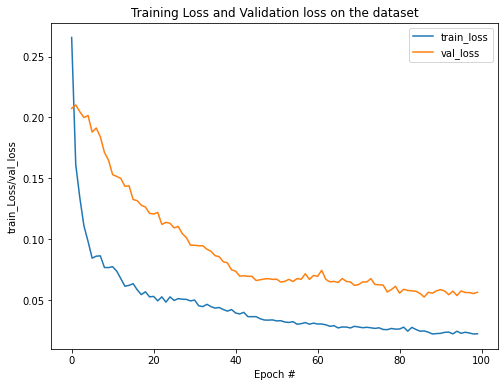

In [ ]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

As you can see the model is learning now and learning curves are decreasing but there is some noise in training but previously for model-2, the curves were constant and that might be due to vanishing gradients. Batch norm reduces the vanishing gradient problem

In [ ]:
model3.evaluate(scaled_test_x , scaled_test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.0688 - mse: 0.0688


[0.06882213801145554, 0.06882213801145554]

In [ ]:
#Lets Print the predicted prices 
test_predictionsk=model3.predict(scaled_test_x )
y_pred1=scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(scaler.inverse_transform(scaled_test_y.reshape(-1, 1)),y_pred1)

-0.6741757721296566

# Model-4

In [ ]:
import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense,Dropout       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='he_normal')
  model.add(input_layer) # 
  #Adding the hidden layer
  model.add(BatchNormalization())# defining the batchnorm
  model.add(Dropout(0.1))# defining the dropout 
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(16, activation='relu',kernel_initializer='he_normal'); # defining the weight initialiazer 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu',kernel_initializer='he_normal') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 
 #Loss function 
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

In [ ]:
#Getting the model summary. We are uisng standalone keras to build our model
model4 = build_model()
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 112       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 305
Trainable params: 289
Non-trainable params: 16
_________________________________________________________________


In [ ]:
#Definign the number of epochs
import numpy as np
EPOCHS = 100
#fitting the model
history = model3.fit(
  scaled_train_x , scaled_train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0502 - val_mse: 0.0502
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0220 - m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'middle'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


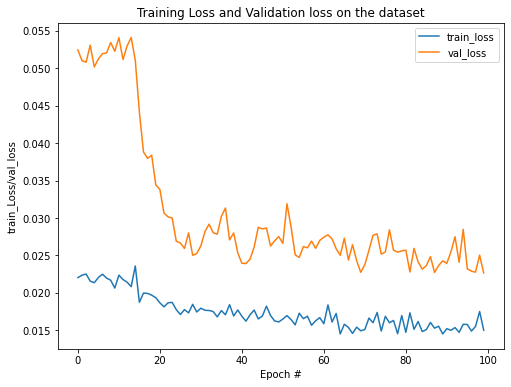

In [ ]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

As you see, when we have used batchnorm and dropout together then the model is underfitting. since model is not learning well on training data  

In [ ]:
model4.evaluate(scaled_test_x , scaled_test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.0855 - mse: 0.0855


[0.091799296438694, 0.091799296438694]

In [ ]:
#Lets Print the predicted prices 
test_predictionsk=model4.predict(scaled_test_x )
y_pred1=scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(scaler.inverse_transform(scaled_test_y.reshape(-1, 1)),y_pred1)

-1.233120698932919

Conclusion:

We can see that the skeleton model is working fine here for this problem. As you see , we have the best r2 and test error for the skeleton model. 

But the different combination of weight initialization and dropout rate might work , if we tune these hyperparameters.